<a href="https://colab.research.google.com/github/yeahginny/Machine_learning/blob/main/%ED%95%B4%EC%84%9D%EB%AA%A8%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# library import
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
# 현재경로 확인
os.getcwd()

# 데이터 불러오기
data = pd.read_csv("./kc_house_data.csv")
data.head() # 데이터 확인

,id,date,price,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1.0,0,3,7,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2.0,0,3,7,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,1.0,0,3,6,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1.0,0,5,7,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1.0,0,3,8,1987,0,98074,47.6168,-122.045


In [ ]:
# shape 파악
nCar = data.shape[0] # 데이터 개수
nVar = data.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 21613 nVar: 14


In [ ]:
# 의미가 없다고 생각되는 변수 제거
data = data.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis = 1) # id, date, zipcode, lat, long  제거

In [ ]:
feature_columns = list(data.columns.difference(['price'])) # price-target, 그 외 feature

X = data[feature_columns]
y = data['price']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)

# train/test 비율을 7:3
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 확인

(15129, 8) (6484, 8) (15129,) (6484,)


In [ ]:
# lightgbm을 구현하여 shap value를 예측할 것
# ligthgbm 구현

# library
import lightgbm as lgb  # 없을 경우 cmd/anaconda prompt에서 install
from math import sqrt
from sklearn.metrics import mean_squared_error

# lightgbm model
lgb_dtrain = lgb.Dataset(data = train_x, label = train_y) # LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10,
            'learning_rate': 0.01, # Step Size
            'n_estimators': 1000, # Number of trees
            'objective': 'regression'} # 목적 함수 (L2 Loss)
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = lgb_model.predict(test_x) # test data 예측
print("RMSE: {}".format(sqrt(mean_squared_error(lgb_model_predict, test_y)))) # RMSE

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 15129, number of used features: 8
[LightGBM] [Info] Start training from score 537729.263666
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.1/547.1 kB 9.5 MB/s eta 0:00:00


In [ ]:
# shap value를 이용하여 각 변수의 영향도 파악

# !pip install shap (에러 발생시, skimage version 확인 (0.14.2 이상 권장))
# import skimage -> skimage.__version__ (skimage version 확인)
# skimage version upgrade -> !pip install --upgrade scikit-image

# shap value
import shap
explainer = shap.TreeExplainer(lgb_model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(test_x) # Shap Values 계산

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
 #위의 과정은 첫 번째 test data instance에 대해 Shap Value를 적용하여 시각화한 것이다.
 #빨간색이 양의 영향도가 높은 것이고, 파란색이 음의 영향도가 높은 것이다.
 #즉 집의 condition과 bedrooms/bathrooms가 집 가격에 큰 양의 영향력을 주고,
 #yr_bulit, floors, waterfront는 음의 영향력을 준다고 보여진다.

In [ ]:
#shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value, shap_values[1,:], test_x.iloc[1,:])

In [ ]:
 # 이는 전체 test데이터 셋에 대해서 적용한 것이다.
 # 가로축에는 변수와 sample order를 선택할 수 있는 피벗이 생성되고,
 # 세로축에는 각각의 변수에 대한 영향력과 model output value를 선택할 수 있는 피벗이 생성된다.
 # 이를 바꿔가면서 변수에 대한 영향력과 전반적인 모델의 설명을 확인할 수 있다.

In [ ]:
# 전체 검증 데이터 셋에 대해서 적용
shap.force_plot(explainer.expected_value, shap_values, test_x)

shap.plots.force is slow for many thousands of rows, try subsampling your data.


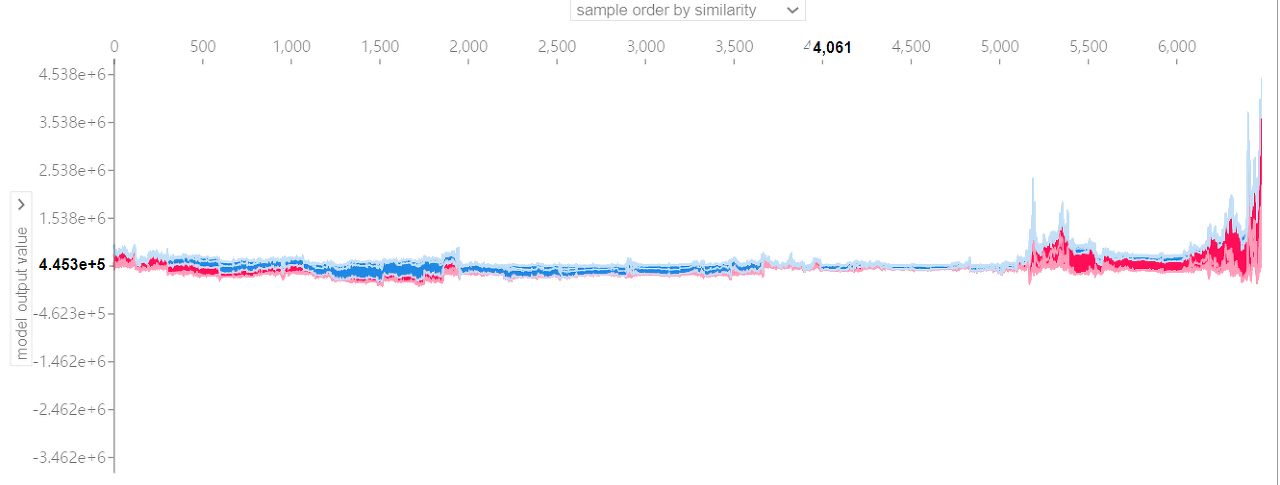

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


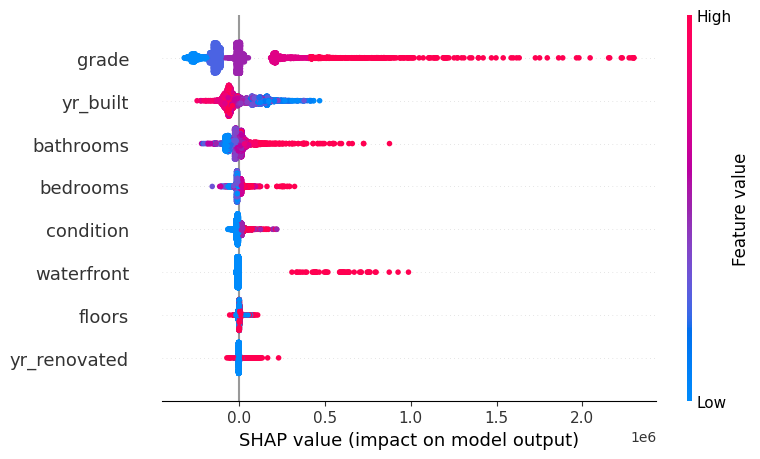

In [ ]:
# summary
shap.summary_plot(shap_values, test_x)

In [ ]:
 # 위는 모든 변수들의 shap value를 요약한 것이다. 해당 변수가 빨간색을 띄면 target(price)에 대해 양의 영향력이 존재하는 것이고, 파란색을 띄면 음의 영향력이 존재하는 것이다. 해석을 하면 아래와 같다.

# - grade : 변수의 값이 높을 수록, 예상 가격이 높은 경향성이 있다.
# - yr_built : 변수의 값이 낮을 수록, 예상 가격이 높은 경향성이 있다.
# - bathrooms : 변수의 값이 높을 수록, 예상 가격이 높은 경향성이 있다.
# - bedrooms : 변수의 값이 높을 수록, 예상 가격이 높은 경향성이 있다.
# - condition : 변수의 값이 높을 수록, 예상 가격이 높은 경향성이 있다
# - waterfront : 변수의 값이 높을 수록, 예상 가격이 높은 경향성이 있다.
# - floors : 해석 모호성 (Feature Value에 따른 Shap Values의 상관성 파악 모호)
# - yr_renovated : 해석 모호성 (Feature Value에 따른 Shap Values의 상관성 파악 모호)



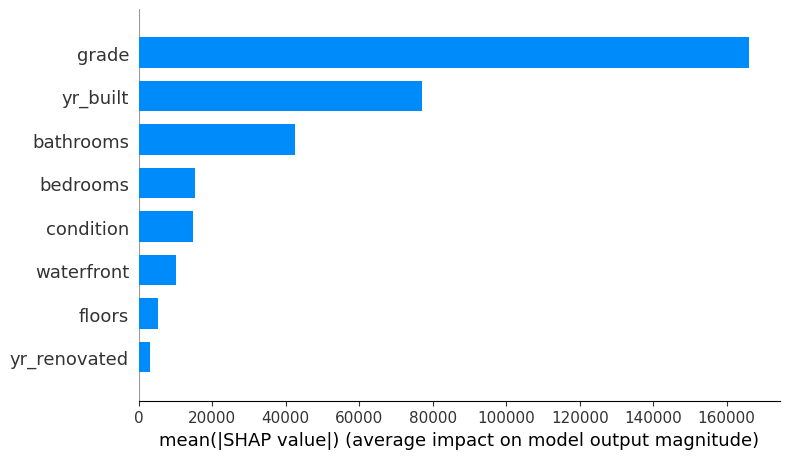

In [ ]:
 # 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
shap.summary_plot(shap_values, test_x, plot_type = "bar")

In [ ]:
 # 이는 각 변수의 shap value에 절대값을 취한 것으로 변수의 평균적인 영향력을 보여준다. 큰 영향력을 보일 수록,
 # target과 관계성(인과관계X)이 크다는 것이다. 즉, 변수의 중요도와 비슷한 개념이다.

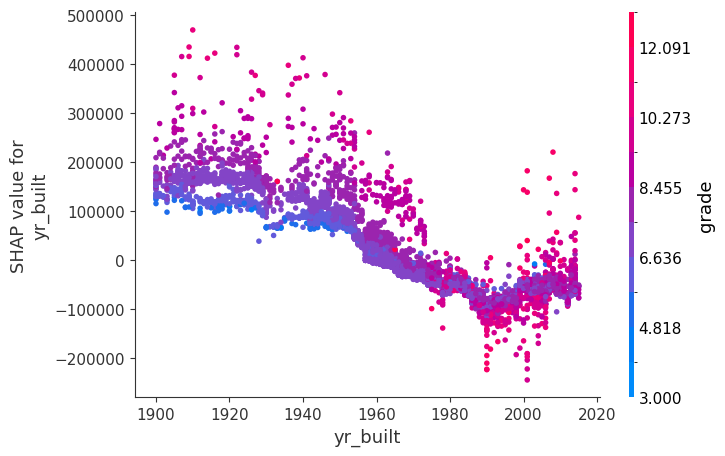

In [ ]:
 # 변수 간의 shap value 파악
shap.dependence_plot("yr_built", shap_values, test_x)

In [ ]:
 # 이는 변수간 의존성을 보여주는 shap value이다.
 # 위를 보면, 빨간 점이 최신일수록 파란점에 비해 많이 분포하기에,
 # 최신 집일수록 grade가 높은 경향이 있다고 보여진다.

In [ ]:
 # shap value는 변수별로 산출을 할수도 있지만 그렇게 사용하기 보다는
 # shap value의 실제값과 묶어서 shap value의 수치가 높을때 진짜 실제값과 상관성이 있는지를 파악해야한다.
